In [ ]:
# Initialization code that runs before all other cells
import marimo as mo
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.model_selection import BaseCrossValidator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor


pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 30)
plt.style.use("seaborn-v0_8-whitegrid")

# Load data

In [ ]:
train_df = pd.read_csv("data/train.csv")
train_df["file_id"] = "train"

train_df

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"datetime\":\"2011-01-01 00:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.84,\"atemp\":14.395,\"humidity\":81,\"windspeed\":0.0,\"casual\":3,\"registered\":13,\"count\":16,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 01:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.02,\"atemp\":13.635,\"humidity\":80,\"windspeed\":0.0,\"casual\":8,\"registered\":32,\"count\":40,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 02:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.02,\"atemp\":13.635,\"humidity\":80,\"windspeed\":0.0,\"casual\":5,\"registered\":27,\"count\":32,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 03:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.84,\"atemp\":14.395,\"humidity\":75,\"windspeed\":0.0,\"casual\":3,\"registered\":10,\"count\":13,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 04:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.84,\"atemp\":14.395,\"humidity\":75,\"windspeed\":0.0,\"casual\":0,\"registered\":1,\"count\":1,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 05:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":2,\"temp\":9.84,\"atemp\":12.88,\"humidity\":75,\"windspeed\":6.0032,\"casual\":0,\"registered\":1,\"count\":1,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 06:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.02,\"atemp\":13.635,\"humidity\":80,\"windspeed\":0.0,\"casual\":2,\"registered\":0,\"count\":2,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 07:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":8.2,\"atemp\":12.88,\"humidity\":86,\"windspeed\":0.0,\"casual\":1,\"registered\":2,\"count\":3,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 08:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.84,\"atemp\":14.395,\"humidity\":75,\"windspeed\":0.0,\"casual\":1,\"registered\":7,\"count\":8,\"file_id\":\"train\"},{\"datetime\":\"2011-01-01 09:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":13.12,\"atemp\":17.425,\"humidity\":76,\"windspeed\":0.0,\"casual\":8,\"registered\":6,\"count\":14,\"file_id\":\"train\"}]"' data-total-rows='10886' data-total-columns='13' data-max-columns='50' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["datetime", ["string", "object"]], ["season", ["integer", "int64"]], ["holiday", ["integer", "int64"]], ["workingday", ["integer", "int64"]], ["weather", ["integer", "int64"]], ["temp", ["number", "float64"]], ["atemp", ["number", "float64"]], ["humidity", ["integer", "int64"]], ["windspeed", ["number", "float64"]], ["casual", ["integer", "int64"]], ["registered", ["integer", "int64"]], ["count", ["integer", "int64"]], ["file_id", ["string", "object"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='true' data-row-headers='[]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

In [ ]:
test_df = pd.read_csv("data/test.csv")
test_df["registered"] = 0
test_df["casual"] = 0
test_df["count"] = 0
test_df["file_id"] = "test"

test_df

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"datetime\":\"2011-01-20 00:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":10.66,\"atemp\":11.365,\"humidity\":56,\"windspeed\":26.0027,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 01:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":10.66,\"atemp\":13.635,\"humidity\":56,\"windspeed\":0.0,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 02:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":10.66,\"atemp\":13.635,\"humidity\":56,\"windspeed\":0.0,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 03:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":10.66,\"atemp\":12.88,\"humidity\":56,\"windspeed\":11.0014,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 04:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":10.66,\"atemp\":12.88,\"humidity\":56,\"windspeed\":11.0014,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 05:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":9.84,\"atemp\":11.365,\"humidity\":60,\"windspeed\":15.0013,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 06:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":9.02,\"atemp\":10.605,\"humidity\":60,\"windspeed\":15.0013,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 07:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":9.02,\"atemp\":10.605,\"humidity\":55,\"windspeed\":15.0013,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 08:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":1,\"temp\":9.02,\"atemp\":10.605,\"humidity\":55,\"windspeed\":19.0012,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"},{\"datetime\":\"2011-01-20 09:00:00\",\"season\":1,\"holiday\":0,\"workingday\":1,\"weather\":2,\"temp\":9.84,\"atemp\":11.365,\"humidity\":52,\"windspeed\":15.0013,\"registered\":0,\"casual\":0,\"count\":0,\"file_id\":\"test\"}]"' data-total-rows='6493' data-total-columns='13' data-max-columns='50' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["datetime", ["string", "object"]], ["season", ["integer", "int64"]], ["holiday", ["integer", "int64"]], ["workingday", ["integer", "int64"]], ["weather", ["integer", "int64"]], ["temp", ["number", "float64"]], ["atemp", ["number", "float64"]], ["humidity", ["integer", "int64"]], ["windspeed", ["number", "float64"]], ["registered", ["integer", "int64"]], ["casual", ["integer", "int64"]], ["count", ["integer", "int64"]], ["file_id", ["string", "object"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='true' data-row-headers='[]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  file_id     10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
 9   registered  6493 non-null   int64  
 10  casual      6493 non-null   int64  
 11  count       6493 non-null   int64  
 12  file_id     6493 non-null   object 
dtypes: float64(3), int64(8), object(2)
memory usage: 659.6+ KB


In [ ]:
train_df.shape, test_df.shape

In [ ]:
all_df = pd.concat([train_df, test_df])
all_df.head()

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"\":0,\"datetime\":\"2011-01-01 00:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.84,\"atemp\":14.395,\"humidity\":81,\"windspeed\":0.0,\"casual\":3,\"registered\":13,\"count\":16,\"file_id\":\"train\"},{\"\":1,\"datetime\":\"2011-01-01 01:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.02,\"atemp\":13.635,\"humidity\":80,\"windspeed\":0.0,\"casual\":8,\"registered\":32,\"count\":40,\"file_id\":\"train\"},{\"\":2,\"datetime\":\"2011-01-01 02:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.02,\"atemp\":13.635,\"humidity\":80,\"windspeed\":0.0,\"casual\":5,\"registered\":27,\"count\":32,\"file_id\":\"train\"},{\"\":3,\"datetime\":\"2011-01-01 03:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.84,\"atemp\":14.395,\"humidity\":75,\"windspeed\":0.0,\"casual\":3,\"registered\":10,\"count\":13,\"file_id\":\"train\"},{\"\":4,\"datetime\":\"2011-01-01 04:00:00\",\"season\":1,\"holiday\":0,\"workingday\":0,\"weather\":1,\"temp\":9.84,\"atemp\":14.395,\"humidity\":75,\"windspeed\":0.0,\"casual\":0,\"registered\":1,\"count\":1,\"file_id\":\"train\"}]"' data-total-rows='5' data-total-columns='13' data-max-columns='50' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["datetime", ["string", "object"]], ["season", ["integer", "int64"]], ["holiday", ["integer", "int64"]], ["workingday", ["integer", "int64"]], ["weather", ["integer", "int64"]], ["temp", ["number", "float64"]], ["atemp", ["number", "float64"]], ["humidity", ["integer", "int64"]], ["windspeed", ["number", "float64"]], ["casual", ["integer", "int64"]], ["registered", ["integer", "int64"]], ["count", ["integer", "int64"]], ["file_id", ["string", "object"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='false' data-row-headers='[""]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

### Simple analysis

In [ ]:
dt = pd.DatetimeIndex(all_df["datetime"])
all_df.set_index(dt, inplace=True)
all_df.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,file_id
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110,train
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93,train
2011-01-01 17:00:00,2011-01-01 17:00:00,1,0,0,2,18.04,21.970,82,19.0012,15,52,67,train


In [ ]:
all_df.describe().round(2)

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"\":\"count\",\"season\":17379.0,\"holiday\":17379.0,\"workingday\":17379.0,\"weather\":17379.0,\"temp\":17379.0,\"atemp\":17379.0,\"humidity\":17379.0,\"windspeed\":17379.0,\"casual\":17379.0,\"registered\":17379.0,\"count\":17379.0},{\"\":\"mean\",\"season\":2.5,\"holiday\":0.03,\"workingday\":0.68,\"weather\":1.43,\"temp\":20.38,\"atemp\":23.79,\"humidity\":62.72,\"windspeed\":12.74,\"casual\":22.56,\"registered\":97.44,\"count\":120.0},{\"\":\"std\",\"season\":1.11,\"holiday\":0.17,\"workingday\":0.47,\"weather\":0.64,\"temp\":7.89,\"atemp\":8.59,\"humidity\":19.29,\"windspeed\":8.2,\"casual\":43.21,\"registered\":141.25,\"count\":170.71},{\"\":\"min\",\"season\":1.0,\"holiday\":0.0,\"workingday\":0.0,\"weather\":1.0,\"temp\":0.82,\"atemp\":0.0,\"humidity\":0.0,\"windspeed\":0.0,\"casual\":0.0,\"registered\":0.0,\"count\":0.0},{\"\":\"25%\",\"season\":2.0,\"holiday\":0.0,\"workingday\":0.0,\"weather\":1.0,\"temp\":13.94,\"atemp\":16.66,\"humidity\":48.0,\"windspeed\":7.0,\"casual\":0.0,\"registered\":0.0,\"count\":0.0},{\"\":\"50%\",\"season\":3.0,\"holiday\":0.0,\"workingday\":1.0,\"weather\":1.0,\"temp\":20.5,\"atemp\":24.24,\"humidity\":63.0,\"windspeed\":13.0,\"casual\":3.0,\"registered\":23.0,\"count\":28.0},{\"\":\"75%\",\"season\":3.0,\"holiday\":0.0,\"workingday\":1.0,\"weather\":2.0,\"temp\":27.06,\"atemp\":31.06,\"humidity\":78.0,\"windspeed\":17.0,\"casual\":26.0,\"registered\":155.0,\"count\":192.0},{\"\":\"max\",\"season\":4.0,\"holiday\":1.0,\"workingday\":1.0,\"weather\":4.0,\"temp\":41.0,\"atemp\":50.0,\"humidity\":100.0,\"windspeed\":57.0,\"casual\":367.0,\"registered\":886.0,\"count\":977.0}]"' data-total-rows='8' data-total-columns='11' data-max-columns='50' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["season", ["number", "float64"]], ["holiday", ["number", "float64"]], ["workingday", ["number", "float64"]], ["weather", ["number", "float64"]], ["temp", ["number", "float64"]], ["atemp", ["number", "float64"]], ["humidity", ["number", "float64"]], ["windspeed", ["number", "float64"]], ["casual", ["number", "float64"]], ["registered", ["number", "float64"]], ["count", ["number", "float64"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='false' data-row-headers='[""]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

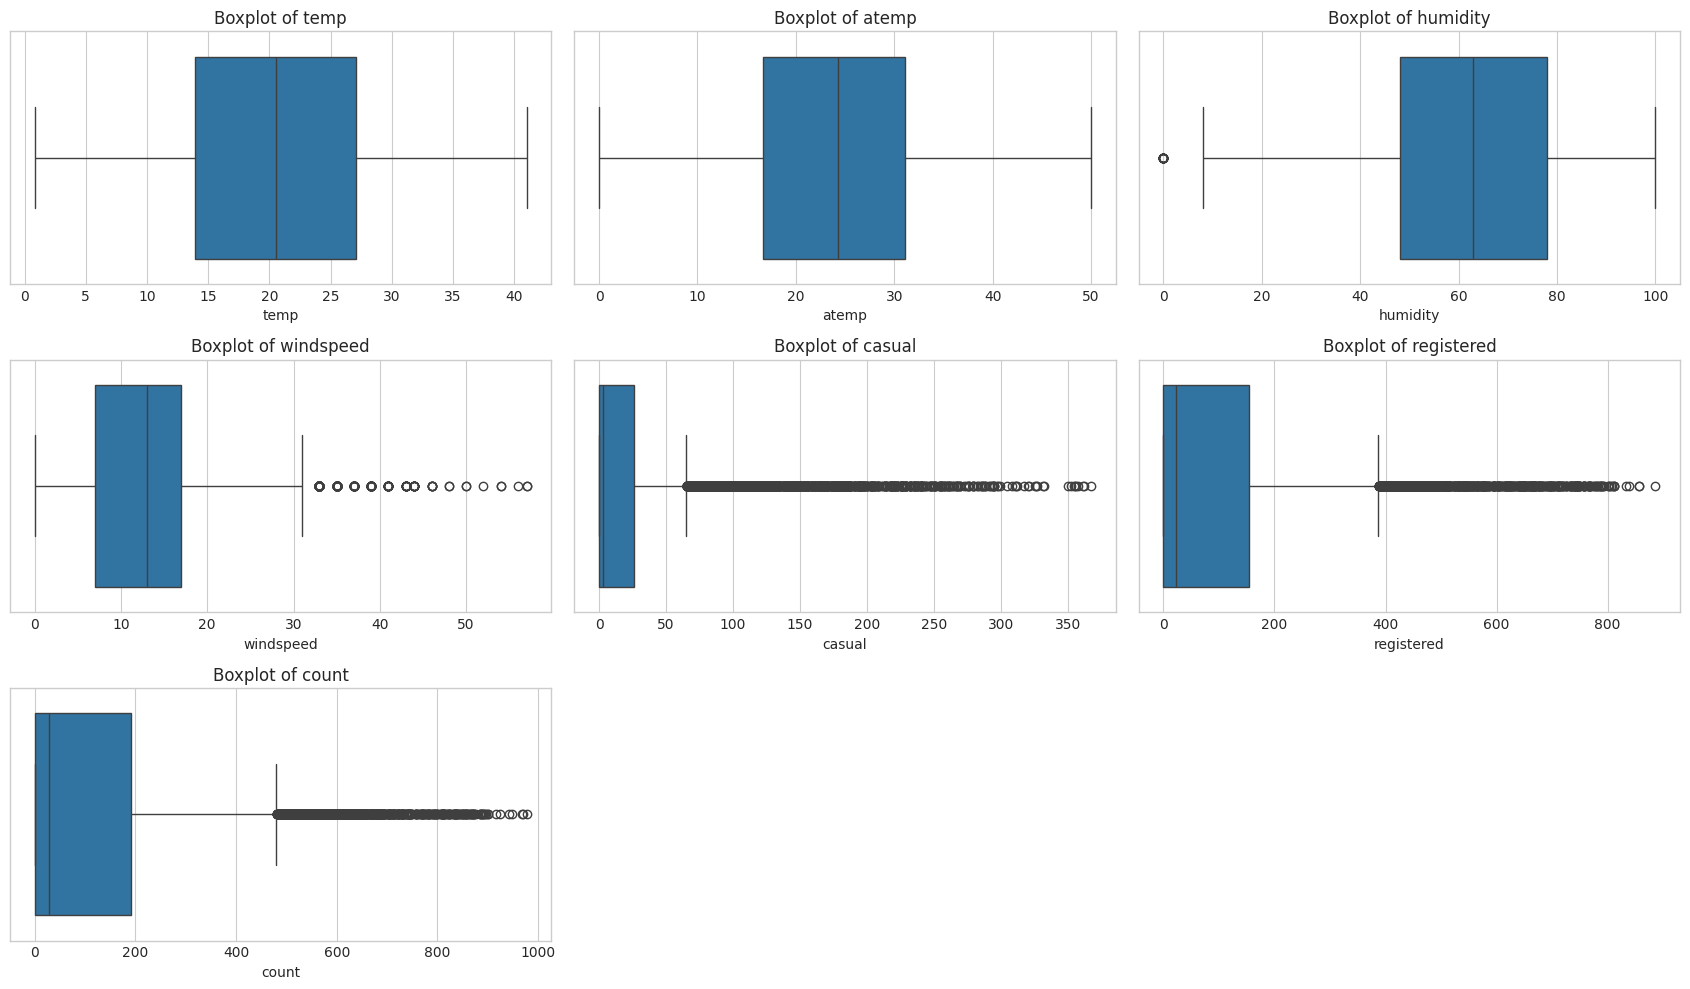

In [ ]:
def _():
    numeric_cols = [
        "temp",
        "atemp",
        "humidity",
        "windspeed",
        "casual",
        "registered",
        "count",
    ]

    plt.figure(figsize=(17, 10))
    for i, col in enumerate(numeric_cols):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=all_df[col])
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


_()

### Interpretation of Variable Distributions

- temperatures & humidity have no out outliers
- windspeed, casual, registered, count have lot of outliers

=> Apply log-transform to make outliers less influencial

In [ ]:
for _col in ["windspeed", "casual", "registered", "count"]:
    all_df[f"{_col}_log"] = np.log(all_df[_col] + 1)

all_df.describe().round(2)

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"\":\"count\",\"season\":17379.0,\"holiday\":17379.0,\"workingday\":17379.0,\"weather\":17379.0,\"temp\":17379.0,\"atemp\":17379.0,\"humidity\":17379.0,\"windspeed\":17379.0,\"casual\":17379.0,\"registered\":17379.0,\"count\":17379.0,\"windspeed_log\":17379.0,\"casual_log\":17379.0,\"registered_log\":17379.0,\"count_log\":17379.0},{\"\":\"mean\",\"season\":2.5,\"holiday\":0.03,\"workingday\":0.68,\"weather\":1.43,\"temp\":20.38,\"atemp\":23.79,\"humidity\":62.72,\"windspeed\":12.74,\"casual\":22.56,\"registered\":97.44,\"count\":120.0,\"windspeed_log\":2.31,\"casual_log\":1.7,\"registered_log\":2.75,\"count_log\":2.88},{\"\":\"std\",\"season\":1.11,\"holiday\":0.17,\"workingday\":0.47,\"weather\":0.64,\"temp\":7.89,\"atemp\":8.59,\"humidity\":19.29,\"windspeed\":8.2,\"casual\":43.21,\"registered\":141.25,\"count\":170.71,\"windspeed_log\":0.97,\"casual_log\":1.76,\"registered_log\":2.4,\"count_log\":2.49},{\"\":\"min\",\"season\":1.0,\"holiday\":0.0,\"workingday\":0.0,\"weather\":1.0,\"temp\":0.82,\"atemp\":0.0,\"humidity\":0.0,\"windspeed\":0.0,\"casual\":0.0,\"registered\":0.0,\"count\":0.0,\"windspeed_log\":0.0,\"casual_log\":0.0,\"registered_log\":0.0,\"count_log\":0.0},{\"\":\"25%\",\"season\":2.0,\"holiday\":0.0,\"workingday\":0.0,\"weather\":1.0,\"temp\":13.94,\"atemp\":16.66,\"humidity\":48.0,\"windspeed\":7.0,\"casual\":0.0,\"registered\":0.0,\"count\":0.0,\"windspeed_log\":2.08,\"casual_log\":0.0,\"registered_log\":0.0,\"count_log\":0.0},{\"\":\"50%\",\"season\":3.0,\"holiday\":0.0,\"workingday\":1.0,\"weather\":1.0,\"temp\":20.5,\"atemp\":24.24,\"humidity\":63.0,\"windspeed\":13.0,\"casual\":3.0,\"registered\":23.0,\"count\":28.0,\"windspeed_log\":2.64,\"casual_log\":1.39,\"registered_log\":3.18,\"count_log\":3.37},{\"\":\"75%\",\"season\":3.0,\"holiday\":0.0,\"workingday\":1.0,\"weather\":2.0,\"temp\":27.06,\"atemp\":31.06,\"humidity\":78.0,\"windspeed\":17.0,\"casual\":26.0,\"registered\":155.0,\"count\":192.0,\"windspeed_log\":2.89,\"casual_log\":3.3,\"registered_log\":5.05,\"count_log\":5.26},{\"\":\"max\",\"season\":4.0,\"holiday\":1.0,\"workingday\":1.0,\"weather\":4.0,\"temp\":41.0,\"atemp\":50.0,\"humidity\":100.0,\"windspeed\":57.0,\"casual\":367.0,\"registered\":886.0,\"count\":977.0,\"windspeed_log\":4.06,\"casual_log\":5.91,\"registered_log\":6.79,\"count_log\":6.89}]"' data-total-rows='8' data-total-columns='15' data-max-columns='50' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["season", ["number", "float64"]], ["holiday", ["number", "float64"]], ["workingday", ["number", "float64"]], ["weather", ["number", "float64"]], ["temp", ["number", "float64"]], ["atemp", ["number", "float64"]], ["humidity", ["number", "float64"]], ["windspeed", ["number", "float64"]], ["casual", ["number", "float64"]], ["registered", ["number", "float64"]], ["count", ["number", "float64"]], ["windspeed_log", ["number", "float64"]], ["casual_log", ["number", "float64"]], ["registered_log", ["number", "float64"]], ["count_log", ["number", "float64"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='false' data-row-headers='[""]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

In [ ]:
# create basic time index features

all_df["date"] = dt.date
all_df["day"] = dt.day
all_df["month"] = dt.month
all_df["year"] = dt.year
all_df["hour"] = dt.hour
all_df["dow"] = dt.dayofweek

In [ ]:
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,file_id,windspeed_log,casual_log,registered_log,count_log,date,day,month,year,hour,dow
datetime,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,train,0.000000,1.386294,2.639057,2.833213,2011-01-01,1,1,2011,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,train,0.000000,2.197225,3.496508,3.713572,2011-01-01,1,1,2011,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,train,0.000000,1.791759,3.332205,3.496508,2011-01-01,1,1,2011,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,train,0.000000,1.386294,2.397895,2.639057,2011-01-01,1,1,2011,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,train,0.000000,0.000000,0.693147,0.693147,2011-01-01,1,1,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test,2.485023,0.000000,0.000000,0.000000,2012-12-31,31,12,2012,19,0
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,test,2.485023,0.000000,0.000000,0.000000,2012-12-31,31,12,2012,20,0
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,test,2.485023,0.000000,0.000000,0.000000,2012-12-31,31,12,2012,21,0


# Exploratory data analysis

In [ ]:
# plotly for fancy interactive figures uWu
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# count by day
def _():
    df = (
        all_df[all_df["day"] < 19]
        .groupby(all_df["date"])["count"]
        .agg("mean")
        .reset_index()
    )

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=df["date"],
            y=df["count"],
            name="Daily Bike Count",
        )
    )
    line = dict(color="#33CC99")

    fig.update_layout(
        title="Bike Sharing Trends over Time (Day < 19)",
        xaxis_title="Date",
        yaxis_title="Rental",
    )

    fig.show()


_()

<marimo-plotly data-figure='{"data": [{"name": "Daily Bike Count", "x": ["2011-01-01", "2011-01-02", "2011-01-03", "2011-01-04", "2011-01-05", "2011-01-06", "2011-01-07", "2011-01-08", "2011-01-09", "2011-01-10", "2011-01-11", "2011-01-12", "2011-01-13", "2011-01-14", "2011-01-15", "2011-01-16", "2011-01-17", "2011-01-18", "2011-02-01", "2011-02-02", "2011-02-03", "2011-02-04", "2011-02-05", "2011-02-06", "2011-02-07", "2011-02-08", "2011-02-09", "2011-02-10", "2011-02-11", "2011-02-12", "2011-02-13", "2011-02-14", "2011-02-15", "2011-02-16", "2011-02-17", "2011-02-18", "2011-03-01", "2011-03-02", "2011-03-03", "2011-03-04", "2011-03-05", "2011-03-06", "2011-03-07", "2011-03-08", "2011-03-09", "2011-03-10", "2011-03-11", "2011-03-12", "2011-03-13", "2011-03-14", "2011-03-15", "2011-03-16", "2011-03-17", "2011-03-18", "2011-04-01", "2011-04-02", "2011-04-03", "2011-04-04", "2011-04-05", "2011-04-06", "2011-04-07", "2011-04-08", "2011-04-09", "2011-04-10", "2011-04-11", "2011-04-12", "2011-04-13", "2011-04-14", "2011-04-15", "2011-04-16", "2011-04-17", "2011-04-18", "2011-05-01", "2011-05-02", "2011-05-03", "2011-05-04", "2011-05-05", "2011-05-06", "2011-05-07", "2011-05-08", "2011-05-09", "2011-05-10", "2011-05-11", "2011-05-12", "2011-05-13", "2011-05-14", "2011-05-15", "2011-05-16", "2011-05-17", "2011-05-18", "2011-06-01", "2011-06-02", "2011-06-03", "2011-06-04", "2011-06-05", "2011-06-06", "2011-06-07", "2011-06-08", "2011-06-09", "2011-06-10", "2011-06-11", "2011-06-12", "2011-06-13", "2011-06-14", "2011-06-15", "2011-06-16", "2011-06-17", "2011-06-18", "2011-07-01", "2011-07-02", "2011-07-03", "2011-07-04", "2011-07-05", "2011-07-06", "2011-07-07", "2011-07-08", "2011-07-09", "2011-07-10", "2011-07-11", "2011-07-12", "2011-07-13", "2011-07-14", "2011-07-15", "2011-07-16", "2011-07-17", "2011-07-18", "2011-08-01", "2011-08-02", "2011-08-03", "2011-08-04", "2011-08-05", "2011-08-06", "2011-08-07", "2011-08-08", "2011-08-09", "2011-08-10", "2011-08-11", "2011-08-12", "2011-08-13", "2011-08-14", "2011-08-15", "2011-08-16", "2011-08-17", "2011-08-18", "2011-09-01", "2011-09-02", "2011-09-03", "2011-09-04", "2011-09-05", "2011-09-06", "2011-09-07", "2011-09-08", "2011-09-09", "2011-09-10", "2011-09-11", "2011-09-12", "2011-09-13", "2011-09-14", "2011-09-15", "2011-09-16", "2011-09-17", "2011-09-18", "2011-10-01", "2011-10-02", "2011-10-03", "2011-10-04", "2011-10-05", "2011-10-06", "2011-10-07", "2011-10-08", "2011-10-09", "2011-10-10", "2011-10-11", "2011-10-12", "2011-10-13", "2011-10-14", "2011-10-15", "2011-10-16", "2011-10-17", "2011-10-18", "2011-11-01", "2011-11-02", "2011-11-03", "2011-11-04", "2011-11-05", "2011-11-06", "2011-11-07", "2011-11-08", "2011-11-09", "2011-11-10", "2011-11-11", "2011-11-12", "2011-11-13", "2011-11-14", "2011-11-15", "2011-11-16", "2011-11-17", "2011-11-18", "2011-12-01", "2011-12-02", "2011-12-03", "2011-12-04", "2011-12-05", "2011-12-06", "2011-12-07", "2011-12-08", "2011-12-09", "2011-12-10", "2011-12-11", "2011-12-12", "2011-12-13", "2011-12-14", "2011-12-15", "2011-12-16", "2011-12-17", "2011-12-18", "2012-01-01", "2012-01-02", "2012-01-03", "2012-01-04", "2012-01-05", "2012-01-06", "2012-01-07", "2012-01-08", "2012-01-09", "2012-01-10", "2012-01-11", "2012-01-12", "2012-01-13", "2012-01-14", "2012-01-15", "2012-01-16", "2012-01-17", "2012-01-18", "2012-02-01", "2012-02-02", "2012-02-03", "2012-02-04", "2012-02-05", "2012-02-06", "2012-02-07", "2012-02-08", "2012-02-09", "2012-02-10", "2012-02-11", "2012-02-12", "2012-02-13", "2012-02-14", "2012-02-15", "2012-02-16", "2012-02-17", "2012-02-18", "2012-03-01", "2012-03-02", "2012-03-03", "2012-03-04", "2012-03-05", "2012-03-06", "2012-03-07", "2012-03-08", "2012-03-09", "2012-03-10", "2012-03-11", "2012-03-12", "2012-03-13", "2012-03-14", "2012-03-15", "2012-03-16", "2012-03-17", "2012-03-18", "2012-04-01", "2012-04-02", "2012-04-03", "2012-04-04", "2012-04-05", "2012-04-06", "2012-04-07", "2012-04-08", "2012-04-09", "2012-04-10", "2012-0

In [ ]:
def _():
    df = all_df.copy()

    # Step 1: Aggregate the data
    df_avg = df.groupby(["hour", "dow"])["count"].mean().reset_index()

    weekday_map = {
        0: "Mon",
        1: "Tue",
        2: "Wed",
        3: "Thu",
        4: "Fri",
        5: "Sat",
        6: "Sun",
    }
    df_avg["dow"] = df_avg["dow"].map(weekday_map)

    # Step 2: Plot with Plotly Express
    fig = px.line(
        df_avg,
        x="hour",
        y="count",
        color="dow",
        markers=True,
        title="Average count of bikes during weekdays and weekends",
    )

    # Step 3: Optional formatting
    fig.update_layout(
        xaxis=dict(range=[-1, 24], tickmode="linear", dtick=1, title="Hour"),
        yaxis_title="Average Count",
        width=1200,
        height=600,
    )

    fig.show()


_()

<marimo-plotly data-figure='{"data": [{"hovertemplate": "dow=Mon<br>hour=%{x}<br>count=%{y}<extra></extra>", "legendgroup": "Mon", "line": {"color": "#636efa", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Mon", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "i6/4iq/4NUCKndiJnZgmQCebbLLJJhtApAJfXP2gC0CDl1PwcgoQQE/sxE7sBCxAO7ETO7HjS0AAAAAAAFhkQLETO7ETuXBAsRM7sROvYUB2Yid2YgdWQNmJndiJxVpAO7ETO7HDYEA7sRM7satgQOzETuzELl9AsRM7sRNrYEBP7MRO7AxnQJ7YiZ3YXXRAO7ETO7GDc0DsxE7sxB5sQNmJndiJgWNAYid2Yif2W0AUO7ETO8FSQNmJndiJ3URA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Tue<br>hour=%{x}<br>count=%{y}<extra></extra>", "legendgroup": "Tue", "line": {"color": "#EF553B", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Tue", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "aIuV4RtRMUAAAAAAAAAeQApMOjUPcg9AhixkIQtZBEDuDIl5O0MKQK+fLVaGby5AiIeHh4eHUECIh4eHh1dnQB4eHh4eZnJAVVVVVVWFYkDEw8PDw0NUQDc3Nzc311ZApJLzsoiPXECe2Imd2GlcQLETO7ETY1lAsRM7sRNLXEBiJ3ZiJzJmQDuxEzuxQXVAYid2YidsdEAndmIndtJrQGIndmInhmNAip3YiZ2gXEAUO7ETO2lUQE/sxE7sxEdA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Wed<br>hour=%{x}<br>count=%{y}<extra></extra>", "legendgroup": "Wed", "line": {"color": "#00cc96", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Wed", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "dmIndmKnNkBP7MRO7IQjQKuqqqqqqhRA+5UCtX6lCECrqqqqquoHQOzETuzETi9Aip3YiZ2IUEBP7MRO7DhnQJ7YiZ3Y83JAdmIndmKnYkBiJ3ZiJ65UQNmJndiJRVdAip3YiZ24XUDZiZ3YieVbQE/sxE7sFFpAdmIndmIPXECKndiJnfhkQIqd2Imd5HNAa2NouoNNc0CuNoamO3hrQK42hqY72GNAzssiPoEUXkAH+602hiZWQC+L+ARSSUlA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Thu<br>hour=%{x}<br>count=%{y}<extra></extra>", "legendgroup": "Thu", "line": {"color": "#ab63fa", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Thu", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "B/utNoamN0Bhv9XG0HQjQCMjIyMjIxVAEI31obE+CEC4HoXrUbgKQNMd7LfaGDBAhP1WG0MTUUBQIJWcl0VoQBma7mC/lXNAhP1WG0MTY0C1MTTdwT5UQOITSCXnpVhAAqnkvCxiX0DJeVnEJ9BeQFnEJ5BKjltAUCCVnJeFXkAndmIndoZmQNmJndiJ9XRAYid2YifMc0BP7MRO7HBsQCd2Yid2RmVAxU7sxE40X0AndmIndkJXQCd2Yid2Ik9A"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Fri<br>hour=%{x}<br>count=%{y}<extra></extra>", "legendgroup": "Fri", "line": {"color": "#FFA15A", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Fri", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "FDuxEzthQECKndiJnRguQIqd2Imd2B5Av76+vr6+DkAtTyLTsN0MQE/sxE7sxCxAxU7sxE4cTEAAAAAAAIxjQDuxEzuxFXJAdmIndmIvZEAAAAAAACBYQGIndmInvlxAJ3ZiJ3YuYkDsxE7sxLZiQHZiJ3Zid2FAip3YiZ0cY0AAAAAAAIBpQE/sxE7sTnNAYid2YidycECe2Imd2FlnQBQ7sRM7rWBAO7ETO7FLWkCxEzuxE3tXQMVO7MROZFJA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Sat<br>hour=%{x}<br>count=%{y}<extra></extra>", "legendgroup": "Sat", "line": {"color": "#19d3f3", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+marke

In [ ]:
def _():
    df = all_df.copy()

    # Step 1: Aggregate the data
    df_avg = df.groupby(["hour", "dow"])["registered"].mean().reset_index()

    weekday_map = {
        0: "Mon",
        1: "Tue",
        2: "Wed",
        3: "Thu",
        4: "Fri",
        5: "Sat",
        6: "Sun",
    }
    df_avg["dow"] = df_avg["dow"].map(weekday_map)

    # Step 2: Plot with Plotly Express
    fig = px.line(
        df_avg,
        x="hour",
        y="registered",
        color="dow",
        markers=True,
        title="Average count of bikes during weekdays and weekends of registered users",
    )

    # Step 3: Optional formatting
    fig.update_layout(
        xaxis=dict(range=[-1, 24], tickmode="linear", dtick=1, title="Hour"),
        yaxis_title="Average Count",
        width=1200,
        height=600,
    )

    fig.show()


_()

<marimo-plotly data-figure='{"data": [{"hovertemplate": "dow=Mon<br>hour=%{x}<br>registered=%{y}<extra></extra>", "legendgroup": "Mon", "line": {"color": "#636efa", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Mon", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "SZIkSZIkL0DsxE7sxA4gQHIcx3EcxxFAPYlMw3azBEAqeDkFL6cIQHZiJ3ZiJypAT+zETuyUSkDsxE7sxHZjQGIndmInrm9A2Ymd2Il1XkBiJ3ZiJ+ZOQNmJndiJ5VJAYid2YicWWUBiJ3ZiJ65YQDuxEzuxU1ZA7MRO7MT2V0B2Yid2YrNiQCd2Yid24nFAT+zETuxqcUDZiZ3YialoQCd2Yid21mBAO7ETO7EbWECxEzuxE/tPQJ7YiZ3YqUFA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Tue<br>hour=%{x}<br>registered=%{y}<extra></extra>", "legendgroup": "Tue", "line": {"color": "#EF553B", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Tue", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "VoZvRIFJK0CamZmZmZkWQLZYGb4RBQZATm9605veAECJeTtDYt4GQMvwjSgw6SxAiIeHh4fHT0A8PDw8PFxmQHNzc3Nzi3FA2NfX19e3YEDx8PDw8HBPQDc3Nzc3l1FAfAKp5LzsVkA7sRM7satWQIqd2ImdmFNA2Ymd2IktVkAAAAAAAMRiQGIndmInJHNAFDuxEzuHckA7sRM7sedoQNmJndiJbWFAxU7sxE4MWUB2Yid2YudRQE/sxE7sVERA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Wed<br>hour=%{x}<br>registered=%{y}<extra></extra>", "legendgroup": "Wed", "line": {"color": "#00cc96", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Wed", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "xU7sxE4MM0DFTuzETiwgQI2MjIyMjBBAF1100UUXBUAAAAAAAEAFQJ7YiZ3YyS1Aip3YiZ2oT0DsxE7sxE5mQJ7YiZ3YC3JAdmIndmLzYEDsxE7sxH5QQBQ7sRM7SVJAJ3ZiJ3YyWEAAAAAAAHBWQJ7YiZ3YAVRAsRM7sRNbVkAndmIndrphQGIndmIn6nFAcl4W8QmEcUAH+602hmZoQC3iE0glh2FAgVRyXhYxWkDEJ5BKzktTQPkEUsl52UVA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Thu<br>hour=%{x}<br>registered=%{y}<extra></extra>", "legendgroup": "Thu", "line": {"color": "#ab63fa", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Thu", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "hqY72G+1M0C42hia7mAfQFpaWlpaWhBAFbycgpdTBEBxPQrXo3AHQPZbbQxNdy5Ak/OyiE9gUEDxCaSS81JnQFAglZyXxXJAkErOyyI+YUDgamNougNQQD6BVHJeFlNA9lttDE23WUB/q42h6Y5YQGG/1cbQNFVA4hNIJeflV0CxEzuxExtjQNmJndiJx3JAO7ETO7HZcUB2Yid2YitpQE/sxE7suGJAAAAAAACYW0CKndiJnThUQNmJndiJDUtA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Fri<br>hour=%{x}<br>registered=%{y}<extra></extra>", "legendgroup": "Fri", "line": {"color": "#FFA15A", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Fri", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "ntiJndjJOkB2Yid2YicoQCd2Yid24hdAoaCgoKCgCEBx9YOOCnwJQAAAAAAAQCtAJ3ZiJ3bSSkAndmIndqZiQOzETuzEMnFAdmIndmIrYkB2Yid2Yp9SQAAAAAAAwFVAO7ETO7ErXEDFTuzETqRcQIqd2ImdKFlAT+zETuzUXEBP7MRO7KRkQOzETuzE0nBAip3YiZ2wbEAUO7ETOwVkQBQ7sRM7+VtA7MRO7MS2VUDFTuzETixTQGIndmIndk5A"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Sat<br>hour=%{x}<br>registered=%{y}<extra></extra>", "legendgroup": "Sat", "line": {"color": "#19d3f3", "dash": "solid"}, "marker": {"symbol": "

In [ ]:
def _():
    df = all_df.copy()

    # Step 1: Aggregate the data
    df_avg = df.groupby(["hour", "dow"])["casual"].mean().reset_index()

    weekday_map = {
        0: "Mon",
        1: "Tue",
        2: "Wed",
        3: "Thu",
        4: "Fri",
        5: "Sat",
        6: "Sun",
    }
    df_avg["dow"] = df_avg["dow"].map(weekday_map)

    # Step 2: Plot with Plotly Express
    fig = px.line(
        df_avg,
        x="hour",
        y="casual",
        color="dow",
        markers=True,
        title="Average count of bikes during weekdays and weekends of casual users",
    )

    # Step 3: Optional formatting
    fig.update_layout(
        xaxis=dict(range=[-1, 24], tickmode="linear", dtick=1, title="Hour"),
        yaxis_title="Average Count",
        width=1200,
        height=600,
    )

    fig.show()


_()

<marimo-plotly data-figure='{"data": [{"hovertemplate": "dow=Mon<br>hour=%{x}<br>casual=%{y}<extra></extra>", "legendgroup": "Mon", "line": {"color": "#636efa", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Mon", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "mpmZmZmZGUB2Yid2YicKQGr9SoFavwJAnOVJZBq26z9u27Zt27btP4qd2Imd2O0/xU7sxE7sBEB2Yid2YiccQAAAAAAAQCxAJ3ZiJ3aiM0AUO7ETO1E6QAAAAAAAgD9AJ3ZiJ3biQEAndmIndlJBQGIndmIntkFA7MRO7MS+QUBiJ3ZiJ2ZBQLETO7ET20NAYid2YifGQECe2Imd2Kk7QIqd2ImdWDVAO7ETO7HTLkDZiZ3YiR0mQNmJndiJnRlA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Tue<br>hour=%{x}<br>casual=%{y}<extra></extra>", "legendgroup": "Tue", "line": {"color": "#EF553B", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Tue", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "50Hu+tliDUCamZmZmZn9P6fmQe762fI/velNb3rT2z8nm2yyySbbP0Lu+tliZeg/eHh4eHh4BEBpaWlpaWkfQFVVVVVVVStA2NfX19fXLEAtLS0tLS0yQAAAAAAAADVAn0AqOS+LNkCKndiJnfg2QJ7YiZ3YKTdAYid2Yid2OEAUO7ETO3E7QMVO7MRO7EBA7MRO7MROPkBiJ3ZiJ1Y3QE/sxE7sxDBAJ3ZiJ3aiLEDsxE7sxA4kQAAAAAAAgBtA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Wed<br>hour=%{x}<br>casual=%{y}<extra></extra>", "legendgroup": "Wed", "line": {"color": "#00cc96", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Wed", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "ip3YiZ3YDEBP7MRO7MT6P3h4eHh4ePA/HMdxHMdx3D9VVVVVVVXVP+zETuzETug/ntiJndiJBkBP7MRO7EQdQAAAAAAAAC1AAAAAAABAK0DZiZ3Yib0wQBQ7sRM78TNAip3YiZ0YNkBiJ3ZiJ9Y1QMVO7MROTDhAFDuxEzvRNkAUO7ETO/E5QHZiJ3Zipz9AiU8glZyXPEA03cF+q404QAqkkvOyiDJAaLqD/VYbL0AZmu5gv9UmQLUxNN3BfhtA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Thu<br>hour=%{x}<br>casual=%{y}<extra></extra>", "legendgroup": "Thu", "line": {"color": "#ab63fa", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Thu", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "CqSS87KID0AokErOyyL+PyMjIyMjI/M/1ofG+tBY3z89CtejcD3aPwf7rTaGpus/Iz6BVHJeBkDOyyI+gVQeQCo5L4v4BCpAOS+L+ARSLUBXG0PTHewwQJBKzssiPjZAMjTdwX6rNkAqOS+L+AQ5QOITSCXnZTlAtTE03cF+OkCxEzuxE1s7QAAAAAAAcEFAdmIndmInP0DFTuzETiw6QMVO7MRObDRAJ3ZiJ3biLEDsxE7sxE4oQDuxEzuxUyBA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Fri<br>hour=%{x}<br>casual=%{y}<extra></extra>", "legendgroup": "Fri", "line": {"color": "#FFA15A", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines+markers", "name": "Fri", "orientation": "v", "showlegend": true, "x": {"dtype": "i4", "bdata": "AAAAAAEAAAACAAAAAwAAAAQAAAAFAAAABgAAAAcAAAAIAAAACQAAAAoAAAALAAAADAAAAA0AAAAOAAAADwAAABAAAAARAAAAEgAAABMAAAAUAAAAFQAAABYAAAAXAAAA"}, "xaxis": "x", "y": {"dtype": "f8", "bdata": "J3ZiJ3biF0BP7MRO7MQHQIqd2Imd2Ps/eHh4eHh46D/bzfIkMg3bP+zETuzETug/2Ymd2ImdBEAUO7ETO7EcQNmJndiJXSxAAAAAAAAgMEAndmIndgI2QIqd2Imd+DtAJ3ZiJ3ZiQEAndmIndpJBQMVO7MROjENAip3YiZ3IQkDFTuzETmxDQBQ7sRM74UNA7MRO7MTOQEBP7MRO7KQ6QE/sxE7shDVAO7ETO7FTMkCxEzuxEzsxQJ7YiZ3YSSlA"}, "yaxis": "y", "type": "scatter"}, {"hovertemplate": "dow=Sat<br>hour=%{x}<br>casual=%{y}<extra></extra>", "legendgroup": "Sat", "line": {"color": "#19d3f3", "dash": "solid"}, "marker": {"symbol": "circle"}, "mode": "lines

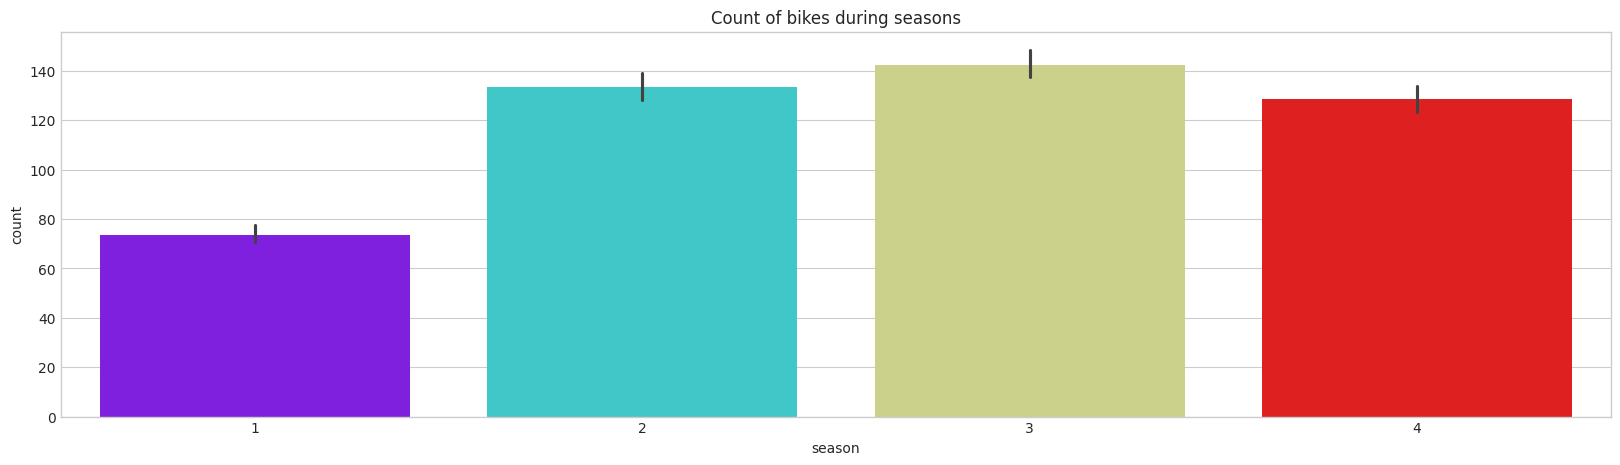

In [ ]:
_df = all_df.copy()

_fig, _ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    data=_df,
    x="season",
    y="count",
    hue="season",
    palette="rainbow",
    legend=False,
    ax=_ax,
)
_ax.set(title="Count of bikes during seasons")

_ax

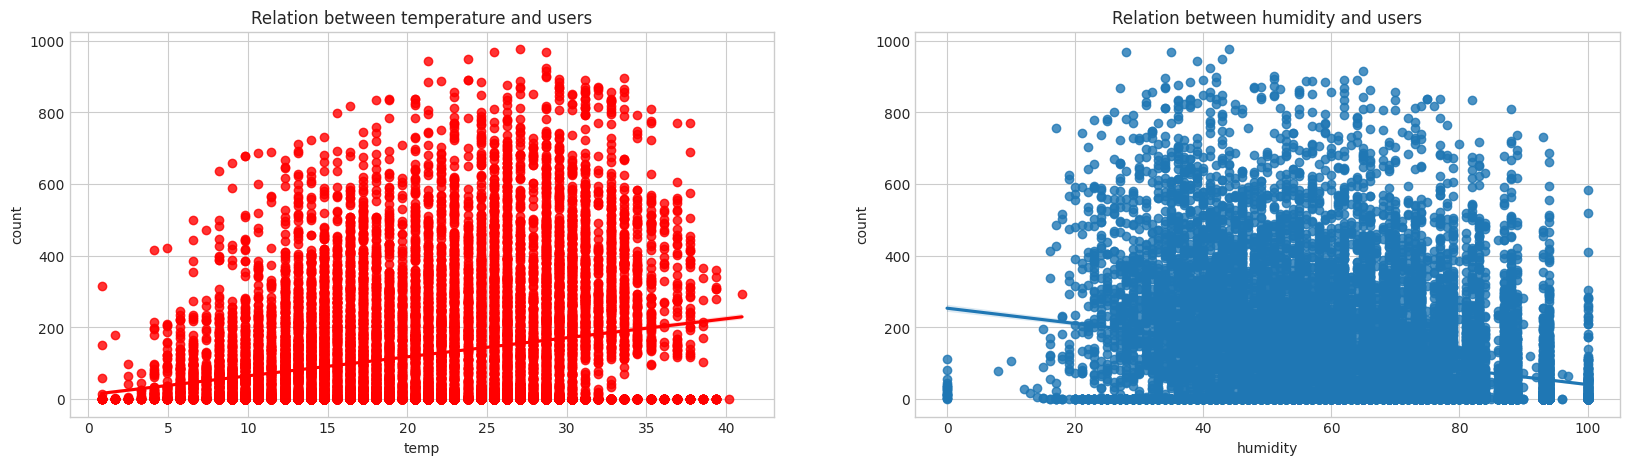

In [ ]:
_df = all_df.copy()

plt.figure(figsize=(17, 10))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
sns.regplot(x=_df["temp"], y=_df["count"], ax=ax1, color="red")
ax1.set(title="Relation between temperature and users")
sns.regplot(x=_df["humidity"], y=_df["count"], ax=ax2)
ax2.set(title="Relation between humidity and users")

fig.gca()

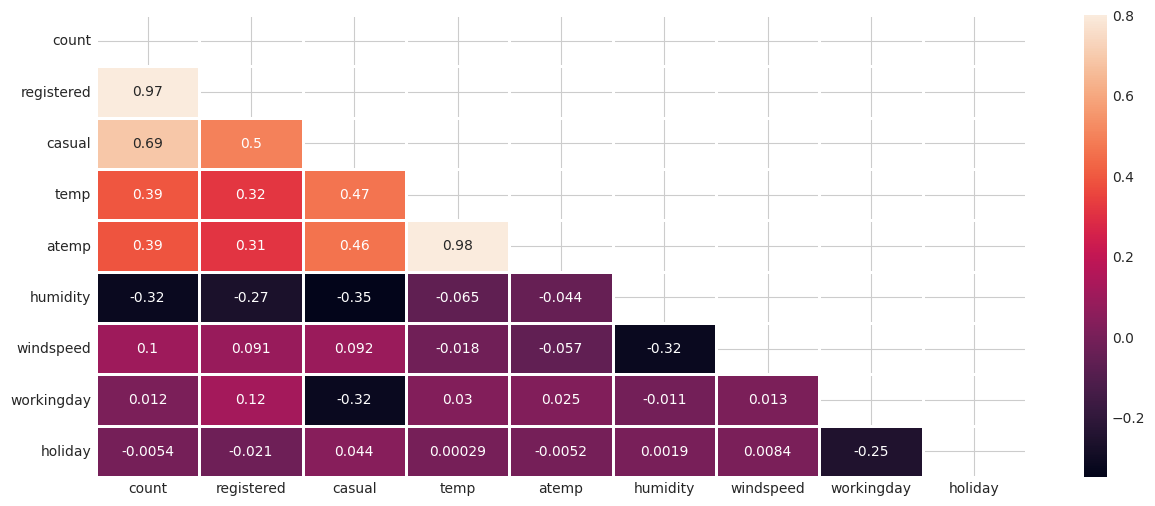

In [ ]:
_df = train_df[
    [
        "count",
        "registered",
        "casual",
        "temp",
        "atemp",
        "humidity",
        "windspeed",
        "workingday",
        "holiday",
    ]
]

corrMatt = _df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
_fig, _ax = plt.subplots(figsize=(15, 6))
sns.heatmap(
    corrMatt,
    mask=mask,
    vmax=0.8,
    square=False,
    annot=True,
    ax=_ax,
    linewidths=1,
)
_ax

### Inferences from correlation heatmap of numerical variables

- Variable temp is positively correlated with dependent variables (casual is more compare to registered)

- Variable atemp is highly correlated with temp.

- Windspeed has lower correlation as compared to temp and humidity

# Feature engineering

In [ ]:
# feature engineer a new column whether its a peak hour or not

all_df["peak"] = all_df[["hour", "workingday"]].apply(
    lambda df: 1
    if (
        (df["workingday"] == 1 and (df["hour"] == 8 or 17 <= df["hour"] <= 18))
        or (df["workingday"] == 0 and 10 <= df["workingday"] <= 19)
    )
    else 0,
    axis=1,
)

# christmas and others
all_df["holiday"] = all_df[["month", "day", "holiday"]].apply(
    lambda df: 1
    if (df["month"] == 12 and df["day"] in [24, 26, 31])
    else df["holiday"],
    axis=1,
)

all_df["workingday"] = all_df[["month", "day", "workingday"]].apply(
    lambda df: 0
    if df["month"] == 12 and df["day"] in [24, 31]
    else df["workingday"],
    axis=1,
)

# from histogram
all_df["ideal"] = all_df[["temp", "windspeed"]].apply(
    lambda df: 1 if (df["temp"] > 27 and df["windspeed"] < 30) else 0, axis=1
)

all_df["sticky"] = all_df[["humidity", "workingday"]].apply(
    lambda df: 1 if (df["workingday"] == 1 and df["humidity"] >= 60) else 0,
    axis=1,
)

# cyclical encoding for capturing seasonal patterns
all_df["hour_sin"] = np.sin(2 * np.pi * all_df["hour"] / 24)
all_df["hour_cos"] = np.cos(2 * np.pi * all_df["hour"] / 24)

all_df["dayofweek_sin"] = np.sin(2 * np.pi * all_df["dow"] / 7)
all_df["dayofweek_cos"] = np.cos(2 * np.pi * all_df["dow"] / 7)

all_df["month_sin"] = np.sin(2 * np.pi * all_df["month"] / 12)
all_df["month_cos"] = np.cos(2 * np.pi * all_df["month"] / 12)

all_df["day_sin"] = np.sin(2 * np.pi * all_df["day"] / 30)
all_df["day_cos"] = np.cos(2 * np.pi * all_df["day"] / 30)

# lag feature
all_df["temp_lag_1"] = all_df["temp"].shift(1)  # at time t-1
all_df["temp_lag_1"] = all_df["temp_lag_1"].fillna(0)

all_df["humidity_lag_24"] = all_df["humidity"].shift(24)  # at same time yesterday
all_df["humidity_lag_24"] = all_df["humidity_lag_24"].fillna(0)


# seasonal indicators
bins = [0, 6, 11, 14, 19, 23]
labels = ["Early Morning", "Morning", "Midday", "Afternoon", "Evening"]
all_df["time_of_day"] = pd.cut(
    all_df["hour"], bins=bins, labels=labels, right=True
)
tod = pd.get_dummies(all_df["time_of_day"], prefix="tod", drop_first=True)

all_df_extras = pd.concat([all_df, tod], axis=1)


all_df_extras = pd.get_dummies(
    all_df_extras,
    columns=["season", "holiday", "workingday", "weather"],
    drop_first=True,
)

In [ ]:
all_df_extras

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,file_id,windspeed_log,casual_log,registered_log,count_log,date,day,month,year,hour,dow,peak,ideal,sticky,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,day_sin,day_cos,temp_lag_1,humidity_lag_24,time_of_day,tod_Morning,tod_Midday,tod_Afternoon,tod_Evening,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,9.84,14.395,81,0.0000,3,13,16,train,0.000000,1.386294,2.639057,2.833213,2011-01-01,1,1,2011,0,5,0,0,0,0.000000,1.000000,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,0.00,0.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 01:00:00,2011-01-01 01:00:00,9.02,13.635,80,0.0000,8,32,40,train,0.000000,2.197225,3.496508,3.713572,2011-01-01,1,1,2011,1,5,0,0,0,0.258819,0.965926,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.84,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 02:00:00,2011-01-01 02:00:00,9.02,13.635,80,0.0000,5,27,32,train,0.000000,1.791759,3.332205,3.496508,2011-01-01,1,1,2011,2,5,0,0,0,0.500000,0.866025,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.02,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 03:00:00,2011-01-01 03:00:00,9.84,14.395,75,0.0000,3,10,13,train,0.000000,1.386294,2.397895,2.639057,2011-01-01,1,1,2011,3,5,0,0,0,0.707107,0.707107,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.02,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 04:00:00,2011-01-01 04:00:00,9.84,14.395,75,0.0000,0,1,1,train,0.000000,0.000000,0.693147,0.693147,2011-01-01,1,1,2011,4,5,0,0,0,0.866025,0.500000,-0.974928,-0.222521,5.000000e-01,0.866025,0.207912,0.978148,9.84,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,10.66,12.880,60,11.0014,0,0,0,test,2.485023,0.000000,0.000000,0.000000,2012-12-31,31,12,2012,19,0,0,0,0,-0.965926,0.258819,0.000000,1.000000,-2.449294e-16,1.000000,0.207912,0.978148,10.66,61.0,Afternoon,False,False,True,False,False,False,False,True,False,True,False,False
2012-12-31 20:00:00,2012-12-31 20:00:00,10.66,12.880,60,11.0014,0,0,0,test,2.485023,0.000000,0.000000,0.000000,2012-12-31,31,12,2012,20,0,0,0,0,-0.866025,0.500000,0.000000,1.000000,-2.449294e-16,1.000000,0.207912,0.978148,10.66,47.0,Evening,False,False,False,True,False,False,False,True,False,True,False,False
2012-12-31 21:00:00,2012-12-31 21:00:00,10.66,12.880,60,11.0014,0,0,0,test,2.485023,0.000000,0.000000,0.000000,2012-12-31,31,12,2012,21,0,0,0,0,-0.707107,0.707107,0.000000,1.000000,-2.449294e-16,1.000000,0.207912,0.978148,10.66,51.0,Evening,False,False,False,True,False,False,False,True,False,False,False,False


# Baseline models

### Using holdout set

In [ ]:
def get_rmsle(y_pred, y_true):
    n = len(y_true)
    rmsle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))
    return rmsle

In [ ]:
def custom_train_valid_split(data, cutoff_day=15):
    train = data[data["day"] <= cutoff_day]
    valid = data[data["day"] > cutoff_day]
    return train, valid

In [ ]:
def prep_data(data, input_cols):
    X = data[input_cols].values
    y_r = data["registered_log"].values
    y_c = data["casual_log"].values

    return X, y_r, y_c

In [ ]:
train = all_df_extras[all_df_extras["file_id"] == "train"]
test = all_df_extras[all_df_extras["file_id"] == "test"]

exclude_cols = [
    "datetime",
    "date",
    "atemp",  # high correlation with temp
    "registered_log",
    "casual_log",
    "count_log",
    "registered",
    "casual",
    "count",
    "file_id",
    "time_of_day",
]

input_cols = [col for col in all_df_extras.columns if col not in exclude_cols]


xgboost_params = {
    "n_estimators": 150,
    "max_depth": 5,
    "learning_rate": 0.1,
    "subsample": 0.7,
    "colsample_bytree": 1.0,  # add if you want column subsampling
    "reg_lambda": 1.0,  # L2 regularization
    "reg_alpha": 0.0,  # L1 regularization
    "random_state": 0,
}

models = {
    "LinearRegression" : make_pipeline(MinMaxScaler(), Ridge(alpha=0.1)),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost" : XGBRegressor(**xgboost_params)

}

train_part, valid_part = custom_train_valid_split(train)
X_train, y_train_r, y_train_c = prep_data(train_part, input_cols)
X_valid, y_valid_r, y_valid_c = prep_data(valid_part, input_cols)

results = {}
feature_importance = {}

for name, model in models.items():
    # Registered model
    model.fit(X_train, y_train_r)
    pred_r_valid = np.exp(model.predict(X_valid)) - 1
    pred_r_train = np.exp(model.predict(X_train)) - 1

    rmsle_r_valid = get_rmsle(pred_r_valid, np.exp(y_valid_r) - 1)
    rmsle_r_train = get_rmsle(pred_r_train, np.exp(y_train_r) - 1)

    # Casual model
    model.fit(X_train, y_train_c)
    pred_c_valid = np.exp(model.predict(X_valid)) - 1
    pred_c_train = np.exp(model.predict(X_train)) - 1

    rmsle_c_valid = get_rmsle(pred_c_valid, np.exp(y_valid_c) - 1)
    rmsle_c_train = get_rmsle(pred_c_train, np.exp(y_train_c) - 1)

    pred_comb_valid = np.round(pred_r_valid + pred_c_valid)
    pred_comb_train = np.round(pred_r_train + pred_c_train)

    pred_comb_valid[pred_comb_valid < 0] = 0
    pred_comb_train[pred_comb_train < 0] = 0

    actual_comb_valid = np.exp(y_valid_r) + np.exp(y_valid_c) - 2
    actual_comb_train = np.exp(y_train_r) + np.exp(y_train_c) - 2

    rmsle_count_valid = get_rmsle(pred_comb_valid, actual_comb_valid)
    rmsle_count_train = get_rmsle(pred_comb_train, actual_comb_train)

    results[name] = {
        "rmsle_r_train": rmsle_r_train,
        "rmsle_r_valid": rmsle_r_valid,
        "rmsle_c_train": rmsle_c_train,
        "rmsle_c_valid": rmsle_c_valid,
        "rmsle_count_train": rmsle_count_train,
        "rmsle_count_valid": rmsle_count_valid,
    }

    if hasattr(model, "feature_importances_"):
        feature_importance[name] = sorted(
            zip(input_cols, model.feature_importances_), key=lambda x: -x[1]
        )

# --- Print results ---
results_df = pd.DataFrame(results).T.sort_values("rmsle_count_valid")
print("Model Performance (RMSLE):\n", results_df)

# --- Interpret feature importance ---
for model_name in ["DecisionTree", "RandomForest", "XGBoost"]:
    if model_name in feature_importance:
        print(f"\nFeature importance for {model_name}:")
        for feat, score in feature_importance[model_name][:10]:  # top 10
            print(f"{feat:<25} {score:.4f}")

Model Performance (RMSLE):
                   rmsle_r_train  rmsle_r_valid  rmsle_c_train  rmsle_c_valid  \
XGBoost            2.159938e-01       0.295734   3.701763e-01       0.515746   
RandomForest       1.126015e-01       0.318448   1.779394e-01       0.551222   
DecisionTree       1.097238e-17       0.463466   1.854670e-17       0.759296   
LinearRegression   6.913610e-01       0.692203   6.389017e-01       0.671085   

                  rmsle_count_train  rmsle_count_valid  
XGBoost                2.174386e-01           0.305949  
RandomForest           1.139653e-01           0.327047  
DecisionTree           3.502987e-16           0.448746  
LinearRegression       6.679506e-01           0.667763  

Feature importance for DecisionTree:
hour                      0.4773
temp                      0.2224
workingday_1              0.0487
humidity                  0.0480
hour_cos                  0.0414
hour_sin                  0.0207
temp_lag_1                0.0178
month            

DecisionTree overfitted, LR got the worst performance,

XGBoost has the lowest error, we can use its choice of features to reduce overfitting in other models

### Modularize the pipeline

In [ ]:
class DualTargetRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_model):
        self.model_r = clone(base_model)
        self.model_c = clone(base_model)

    def fit(self, X, y):
        y_r, y_c = y
        self.model_r.fit(X, y_r)
        self.model_c.fit(X, y_c)
        return self

    def predict(self, X):
        pred_r = np.exp(self.model_r.predict(X)) - 1
        pred_c = np.exp(self.model_c.predict(X)) - 1
        return pred_r, pred_c

    def get_feature_importances(self):
        if hasattr(self.model_r, "feature_importances_") and hasattr(self.model_c, "feature_importances"):
            return {
                "registered" : self.base_model_r.feature_importances_,
                "casual" : self.base_model_c.feature_importances
            }

In [ ]:
def combine_predictions(pred_r, pred_c, true_r=None, true_c=None): 
    pred_comb = np.round(pred_r + pred_c)
    _pred_comb = pred_comb[pred_comb < 0] = 0
    if true_r is not None and true_c is not None:
        true_comb = np.exp(true_r) + np.exp(true_c) - 2
        return pred_comb, true_comb
    else:
        return pred_comb

In [ ]:
def train_and_val(
    models: dict,
    X_train, y_train_r, y_train_c,
    X_val, y_val_r, y_val_c,
):
    results  = {}

    for name, base_model in models.items():
        model = DualTargetRegressor(base_model)
        model.fit(X_train, (y_train_r, y_train_c))

        pred_train_r, pred_train_c = model.predict(X_train)
        pred_val_r, pred_val_c = model.predict(X_val)

        pred_train_count, true_train_count = combine_predictions(pred_train_r, pred_train_c, y_train_r, y_train_c)
        pred_val_count, true_val_count     = combine_predictions(pred_val_r, pred_val_c, y_val_r, y_val_c)

        results[name] = {
            "rmsle_train_r"     : get_rmsle(pred_train_r, np.exp(y_train_r) - 1),
            "rmsle_val_r"       : get_rmsle(pred_val_r,   np.exp(y_val_r) - 1),
            "rmsle_train_c"     : get_rmsle(pred_train_c, np.exp(y_train_c) - 1),
            "rmsle_val_c"       : get_rmsle(pred_val_c,   np.exp(y_val_c) - 1),
            "rmsle_train_count" : get_rmsle(pred_train_count, true_train_count),
            "rmsle_val_count"   : get_rmsle(pred_val_count, true_val_count),
        } 

    results_df = pd.DataFrame(results).T.sort_values("rmsle_val_count") 
    print("Model Performance (RMSLE):\n", results_df)

    return results_df

### Naive Feature selection by XGBoost feature importance

In [ ]:
def _():

    # naive embeddeded feature selection
    selected_features = [
        "hour",
        "workingday_1",
        "temp",
        "sticky",
        "month",
        "year",
        "weather_3",
        "tod_Afternoon",
        "dow",
        "humidity"
    ]

    X_train, y_train_r, y_train_c = prep_data(train_part, selected_features)
    X_val, y_val_r, y_val_c = prep_data(valid_part, selected_features)


    train_and_val(
        models, 
        X_train, y_train_r, y_train_c,
        X_val, y_val_r, y_val_c,
    )
_()

Model Performance (RMSLE):
                   rmsle_train_r  rmsle_val_r  rmsle_train_c  rmsle_val_c  \
XGBoost                0.232187     0.302638       0.404649     0.525816   
RandomForest           0.113244     0.317781       0.182936     0.565064   
DecisionTree           0.018659     0.485783       0.024657     0.768486   
LinearRegression       1.003907     1.006073       0.922647     0.944545   

                  rmsle_train_count  rmsle_val_count  
XGBoost                    0.234605         0.313771  
RandomForest               0.114132         0.328548  
DecisionTree               0.019647         0.457882  
LinearRegression           0.995610         0.997635  


The selected features are mostly sufficient for generalization for XGBoost and RF,

DecisionTree is still overfit.

LR performance degraded. This is expected as tree-based models prefers categorical features, LR, on the otherhand, requires careful feature engineering.

# CV based on days of month

In [ ]:
class MonthDayKFold(BaseCrossValidator):
    def __init__(self, date_col, n_splits=3, train_days=range(1, 16), test_days=(17, 19)):
        self.date_col = date_col
        self.n_splits = n_splits
        self.train_days = train_days
        self.test_days = test_days

    def split(self, X, y=None, groups=None):
        if y is not None or groups is not None:
            raise NotImplementedError("Doesn't support these parameters")

        df = X.copy()
        df['_date'] = pd.to_datetime(df[self.date_col])
        df['_year_month'] = df['_date'].dt.to_period('M')
        df['_day'] = df['_date'].dt.day

        all_months = sorted(df['_year_month'].unique())
        months_per_split = int(np.floor(len(all_months) / self.n_splits))

        for i in range(self.n_splits):
            fold_months = all_months[i * months_per_split : (i+1) * months_per_split]
            fold_df = df[df['_year_month'].isin(fold_months)]

            train_idx = fold_df[fold_df['_day'].isin(self.train_days)].index
            test_idx = fold_df[fold_df['_day'].isin(self.test_days)].index

            if len(train_idx) > 0 and len(test_idx) > 0:
                yield train_idx.to_numpy(), test_idx.to_numpy()


    def get_n_splits(self, X=None, y=None, groups=None):
        return self.n_splits

Model Performance (RMSLE):
          rmsle_train_r  rmsle_val_r  rmsle_train_c  rmsle_val_c  \
XGBoost       0.217923     0.304285       0.373308      0.52748   

         rmsle_train_count  rmsle_val_count  
XGBoost           0.220696          0.31578  


In [ ]:
md_cv = MonthDayKFold(date_col='datetime')
all_folds = list(md_cv.split(train))
train_0, test_0 = all_folds[0]

In [ ]:
train.loc[test_0]

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,file_id,windspeed_log,casual_log,registered_log,count_log,date,day,month,year,hour,dow,peak,ideal,sticky,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,day_sin,day_cos,temp_lag_1,humidity_lag_24,time_of_day,tod_Morning,tod_Midday,tod_Afternoon,tod_Evening,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-17 00:00:00,2011-01-17 00:00:00,8.20,9.850,47,15.0013,1,16,17,train,2.772670,0.693147,2.833213,2.890372,2011-01-17,17,1,2011,0,0,0,0,0,0.000000,1.000000,0.000000,1.000000,0.500000,0.866025,-0.406737,-0.913545,8.20,56.0,NaN,False,False,False,False,False,False,False,True,False,True,False,False
2011-01-17 01:00:00,2011-01-17 01:00:00,8.20,9.850,44,12.9980,1,15,16,train,2.638914,0.693147,2.772589,2.833213,2011-01-17,17,1,2011,1,0,0,0,0,0.258819,0.965926,0.000000,1.000000,0.500000,0.866025,-0.406737,-0.913545,8.20,56.0,Early Morning,False,False,False,False,False,False,False,True,False,True,False,False
2011-01-17 02:00:00,2011-01-17 02:00:00,7.38,8.335,43,16.9979,0,8,8,train,2.890255,0.000000,2.197225,2.197225,2011-01-17,17,1,2011,2,0,0,0,0,0.500000,0.866025,0.000000,1.000000,0.500000,0.866025,-0.406737,-0.913545,8.20,56.0,Early Morning,False,False,False,False,False,False,False,True,False,True,False,False
2011-01-17 03:00:00,2011-01-17 03:00:00,7.38,9.090,43,12.9980,0,2,2,train,2.638914,0.000000,1.098612,1.098612,2011-01-17,17,1,2011,3,0,0,0,0,0.707107,0.707107,0.000000,1.000000,0.500000,0.866025,-0.406737,-0.913545,7.38,69.0,Early Morning,False,False,False,False,False,False,False,True,False,True,False,False
2011-01-17 04:00:00,2011-01-17 04:00:00,7.38,9.850,43,8.9981,1,2,3,train,2.302395,0.693147,1.098612,1.386294,2011-01-17,17,1,2011,4,0,0,0,0,0.866025,0.500000,0.000000,1.000000,0.500000,0.866025,-0.406737,-0.913545,7.38,56.0,Early Morning,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-19 19:00:00,2011-08-19 19:00:00,25.42,29.545,73,31.0009,33,132,165,train,3.465764,3.526361,4.890349,5.111988,2011-08-19,19,8,2011,19,4,0,0,1,-0.965926,0.258819,-0.433884,-0.900969,-0.866025,-0.500000,-0.743145,-0.669131,31.16,83.0,Afternoon,False,False,True,False,False,True,False,False,True,False,True,False
2011-08-19 20:00:00,2011-08-19 20:00:00,25.42,28.790,83,19.9995,12,46,58,train,3.044499,2.564949,3.850148,4.077537,2011-08-19,19,8,2011,20,4,0,0,1,-0.866025,0.500000,-0.433884,-0.900969,-0.866025,-0.500000,-0.743145,-0.669131,25.42,83.0,Evening,False,False,False,True,False,True,False,False,True,False,True,False
2011-08-19 21:00:00,2011-08-19 21:00:00,25.42,28.790,83,8.9981,18,89,107,train,2.302395,2.944439,4.499810,4.682131,2011-08-19,19,8,2011,21,4,0,0,1,-0.707107,0.707107,-0.433884,-0.900969,-0.866025,-0.500000,-0.743145,-0.669131,25.42,79.0,Evening,False,False,False,True,False,True,False,False,True,False,False,False


In [ ]:
train.loc[train_0]

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,file_id,windspeed_log,casual_log,registered_log,count_log,date,day,month,year,hour,dow,peak,ideal,sticky,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,day_sin,day_cos,temp_lag_1,humidity_lag_24,time_of_day,tod_Morning,tod_Midday,tod_Afternoon,tod_Evening,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,9.84,14.395,81,0.0000,3,13,16,train,0.000000,1.386294,2.639057,2.833213,2011-01-01,1,1,2011,0,5,0,0,0,0.000000,1.000000,-0.974928,-0.222521,0.500000,0.866025,2.079117e-01,0.978148,0.00,0.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 01:00:00,2011-01-01 01:00:00,9.02,13.635,80,0.0000,8,32,40,train,0.000000,2.197225,3.496508,3.713572,2011-01-01,1,1,2011,1,5,0,0,0,0.258819,0.965926,-0.974928,-0.222521,0.500000,0.866025,2.079117e-01,0.978148,9.84,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 02:00:00,2011-01-01 02:00:00,9.02,13.635,80,0.0000,5,27,32,train,0.000000,1.791759,3.332205,3.496508,2011-01-01,1,1,2011,2,5,0,0,0,0.500000,0.866025,-0.974928,-0.222521,0.500000,0.866025,2.079117e-01,0.978148,9.02,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 03:00:00,2011-01-01 03:00:00,9.84,14.395,75,0.0000,3,10,13,train,0.000000,1.386294,2.397895,2.639057,2011-01-01,1,1,2011,3,5,0,0,0,0.707107,0.707107,-0.974928,-0.222521,0.500000,0.866025,2.079117e-01,0.978148,9.02,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 04:00:00,2011-01-01 04:00:00,9.84,14.395,75,0.0000,0,1,1,train,0.000000,0.000000,0.693147,0.693147,2011-01-01,1,1,2011,4,5,0,0,0,0.866025,0.500000,-0.974928,-0.222521,0.500000,0.866025,2.079117e-01,0.978148,9.84,0.0,Early Morning,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-15 19:00:00,2011-08-15 19:00:00,28.70,32.575,65,0.0000,54,343,397,train,0.000000,4.007333,5.840642,5.986452,2011-08-15,15,8,2011,19,0,0,1,1,-0.965926,0.258819,0.000000,1.000000,-0.866025,-0.500000,5.665539e-16,-1.000000,28.70,74.0,Afternoon,False,False,True,False,False,True,False,False,True,False,False,False
2011-08-15 20:00:00,2011-08-15 20:00:00,27.06,31.060,74,8.9981,45,240,285,train,2.302395,3.828641,5.484797,5.655992,2011-08-15,15,8,2011,20,0,0,1,1,-0.866025,0.500000,0.000000,1.000000,-0.866025,-0.500000,5.665539e-16,-1.000000,28.70,84.0,Evening,False,False,False,True,False,True,False,False,True,False,False,False
2011-08-15 21:00:00,2011-08-15 21:00:00,27.06,31.060,65,12.9980,34,150,184,train,2.638914,3.555348,5.017280,5.220356,2011-08-15,15,8,2011,21,0,0,1,1,-0.707107,0.707107,0.000000,1.000000,-0.866025,-0.500000,5.665539e-16,-1.000000,27.06,88.0,Evening,False,False,False,True,False,True,False,False,True,False,False,False


In [ ]:
train_2, test_2 = all_folds[2]

In [ ]:
train.loc[test_2]

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,file_id,windspeed_log,casual_log,registered_log,count_log,date,day,month,year,hour,dow,peak,ideal,sticky,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,day_sin,day_cos,temp_lag_1,humidity_lag_24,time_of_day,tod_Morning,tod_Midday,tod_Afternoon,tod_Evening,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-17 00:00:00,2012-05-17 00:00:00,24.60,28.790,78,8.9981,30,49,79,train,2.302395,3.433987,3.912023,4.382027,2012-05-17,17,5,2012,0,3,0,0,1,0.000000,1.000000,0.433884,-0.900969,5.000000e-01,-0.866025,-0.406737,-0.913545,25.42,88.0,NaN,False,False,False,False,True,False,False,False,True,False,False,False
2012-05-17 01:00:00,2012-05-17 01:00:00,24.60,28.030,83,11.0014,12,16,28,train,2.485023,2.564949,2.833213,3.367296,2012-05-17,17,5,2012,1,3,0,0,1,0.258819,0.965926,0.433884,-0.900969,5.000000e-01,-0.866025,-0.406737,-0.913545,24.60,88.0,Early Morning,False,False,False,False,True,False,False,False,True,False,False,False
2012-05-17 02:00:00,2012-05-17 02:00:00,24.60,28.790,78,11.0014,8,8,16,train,2.485023,2.197225,2.197225,2.833213,2012-05-17,17,5,2012,2,3,0,0,1,0.500000,0.866025,0.433884,-0.900969,5.000000e-01,-0.866025,-0.406737,-0.913545,24.60,94.0,Early Morning,False,False,False,False,True,False,False,False,True,False,False,False
2012-05-17 03:00:00,2012-05-17 03:00:00,24.60,29.545,73,16.9979,0,3,3,train,2.890255,0.000000,1.386294,1.386294,2012-05-17,17,5,2012,3,3,0,0,1,0.707107,0.707107,0.433884,-0.900969,5.000000e-01,-0.866025,-0.406737,-0.913545,24.60,88.0,Early Morning,False,False,False,False,True,False,False,False,True,False,False,False
2012-05-17 04:00:00,2012-05-17 04:00:00,24.60,30.305,64,22.0028,3,13,16,train,3.135616,1.386294,2.639057,2.833213,2012-05-17,17,5,2012,4,3,0,0,1,0.866025,0.500000,0.433884,-0.900969,5.000000e-01,-0.866025,-0.406737,-0.913545,24.60,94.0,Early Morning,False,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012-12-19 19:00:00,15.58,19.695,50,26.0027,7,329,336,train,3.295937,2.079442,5.799093,5.820083,2012-12-19,19,12,2012,19,2,0,0,0,-0.965926,0.258819,0.974928,-0.222521,-2.449294e-16,1.000000,-0.743145,-0.669131,15.58,46.0,Afternoon,False,False,True,False,False,False,True,False,True,False,False,False
2012-12-19 20:00:00,2012-12-19 20:00:00,14.76,17.425,57,15.0013,10,231,241,train,2.772670,2.397895,5.446737,5.488938,2012-12-19,19,12,2012,20,2,0,0,0,-0.866025,0.500000,0.974928,-0.222521,-2.449294e-16,1.000000,-0.743145,-0.669131,15.58,50.0,Evening,False,False,False,True,False,False,True,False,True,False,False,False
2012-12-19 21:00:00,2012-12-19 21:00:00,13.94,15.910,61,15.0013,4,164,168,train,2.772670,1.609438,5.105945,5.129899,2012-12-19,19,12,2012,21,2,0,0,1,-0.707107,0.707107,0.974928,-0.222521,-2.449294e-16,1.000000,-0.743145,-0.669131,14.76,50.0,Evening,False,False,False,True,False,False,True,False,True,False,False,False


In [ ]:
train.loc[train_2]

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,file_id,windspeed_log,casual_log,registered_log,count_log,date,day,month,year,hour,dow,peak,ideal,sticky,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,day_sin,day_cos,temp_lag_1,humidity_lag_24,time_of_day,tod_Morning,tod_Midday,tod_Afternoon,tod_Evening,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,2012-05-01 00:00:00,20.50,24.240,59,12.9980,7,28,35,train,2.638914,2.079442,3.367296,3.583519,2012-05-01,1,5,2012,0,1,0,0,0,0.000000,1.000000,0.781831,0.623490,5.000000e-01,-0.866025,2.079117e-01,0.978148,20.50,77.0,NaN,False,False,False,False,True,False,False,False,True,True,False,False
2012-05-01 01:00:00,2012-05-01 01:00:00,20.50,24.240,63,8.9981,0,21,21,train,2.302395,0.000000,3.091042,3.091042,2012-05-01,1,5,2012,1,1,0,0,1,0.258819,0.965926,0.781831,0.623490,5.000000e-01,-0.866025,2.079117e-01,0.978148,20.50,77.0,Early Morning,False,False,False,False,True,False,False,False,True,True,False,False
2012-05-01 02:00:00,2012-05-01 02:00:00,20.50,24.240,72,6.0032,1,7,8,train,1.946367,0.693147,2.079442,2.197225,2012-05-01,1,5,2012,2,1,0,0,1,0.500000,0.866025,0.781831,0.623490,5.000000e-01,-0.866025,2.079117e-01,0.978148,20.50,77.0,Early Morning,False,False,False,False,True,False,False,False,True,True,False,False
2012-05-01 03:00:00,2012-05-01 03:00:00,20.50,24.240,77,0.0000,1,2,3,train,0.000000,0.693147,1.098612,1.386294,2012-05-01,1,5,2012,3,1,0,0,1,0.707107,0.707107,0.781831,0.623490,5.000000e-01,-0.866025,2.079117e-01,0.978148,20.50,77.0,Early Morning,False,False,False,False,True,False,False,False,True,True,False,False
2012-05-01 04:00:00,2012-05-01 04:00:00,21.32,25.000,72,6.0032,1,7,8,train,1.946367,0.693147,2.079442,2.197225,2012-05-01,1,5,2012,4,1,0,0,1,0.866025,0.500000,0.781831,0.623490,5.000000e-01,-0.866025,2.079117e-01,0.978148,20.50,71.0,Early Morning,False,False,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15 19:00:00,2012-12-15 19:00:00,14.76,17.425,62,8.9981,32,225,257,train,2.302395,3.496508,5.420535,5.552960,2012-12-15,15,12,2012,19,5,0,0,0,-0.965926,0.258819,-0.974928,-0.222521,-2.449294e-16,1.000000,5.665539e-16,-1.000000,15.58,53.0,Afternoon,False,False,True,False,False,False,True,False,False,False,False,False
2012-12-15 20:00:00,2012-12-15 20:00:00,14.76,17.425,57,12.9980,23,178,201,train,2.638914,3.178054,5.187386,5.308268,2012-12-15,15,12,2012,20,5,0,0,0,-0.866025,0.500000,-0.974928,-0.222521,-2.449294e-16,1.000000,5.665539e-16,-1.000000,14.76,61.0,Evening,False,False,False,True,False,False,True,False,False,True,False,False
2012-12-15 21:00:00,2012-12-15 21:00:00,14.76,17.425,62,8.9981,15,169,184,train,2.302395,2.772589,5.135798,5.220356,2012-12-15,15,12,2012,21,5,0,0,0,-0.707107,0.707107,-0.974928,-0.222521,-2.449294e-16,1.000000,5.665539e-16,-1.000000,14.76,75.0,Evening,False,False,False,True,False,False,True,False,False,False,False,False


In [ ]:
def train_and_val_cv(
    models: dict,
    data,
    input_cols,
    cv,
):
    results = {name: [] for name in models}

    for fold, (train_idx, val_idx) in enumerate(cv.split(data)): 
        train_part, val_part = data.loc[train_idx], data.loc[val_idx]
        X_train, y_train_r, y_train_c = prep_data(train_part, input_cols)
        X_val, y_val_r, y_val_c = prep_data(val_part, input_cols)

        print(f"\nFold {fold+1}")

        for name, base_model in models.items():
            model = DualTargetRegressor(base_model)
            model.fit(X_train, (y_train_r, y_train_c))

            pred_train_r, pred_train_c = model.predict(X_train)
            pred_val_r, pred_val_c = model.predict(X_val)

            pred_train_count, true_train_count = combine_predictions(
                pred_train_r, pred_train_c, y_train_r, y_train_c
            )
            pred_val_count, true_val_count = combine_predictions(
                pred_val_r, pred_val_c, y_val_r, y_val_c
            )

            fold_result = {
                "rmsle_train_r": get_rmsle(pred_train_r, np.exp(y_train_r) - 1),
                "rmsle_val_r": get_rmsle(pred_val_r, np.exp(y_val_r) - 1),
                "rmsle_train_c": get_rmsle(pred_train_c, np.exp(y_train_c) - 1),
                "rmsle_val_c": get_rmsle(pred_val_c, np.exp(y_val_c) - 1),
                "rmsle_train_count": get_rmsle(pred_train_count, true_train_count),
                "rmsle_val_count": get_rmsle(pred_val_count, true_val_count),
            }

            results[name].append(fold_result)

    averaged_results = {
        name: pd.DataFrame(fold_results).mean().to_dict()
        for name, fold_results in results.items()
    }

    results_df = pd.DataFrame(averaged_results).T.sort_values("rmsle_val_count")
    print("\nCross-validated Model Performance (Avg RMSLE):\n", results_df)

    return results_df

In [ ]:
def _():
    xgboost_params = {
        "n_estimators": 150,
        "max_depth": 5,
        "learning_rate": 0.1,
        "subsample": 0.7,
        "colsample_bytree": 1.0,  # add if you want column subsampling
        "reg_lambda": 1.0,  # L2 regularization
        "reg_alpha": 0.0,  # L1 regularization
        "random_state": 0,
    }


    models = {
        "LinearRegression" : make_pipeline(MinMaxScaler(), Ridge(alpha=0.1)),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost" : XGBRegressor(**xgboost_params)
    }


    exclude_cols = [
        "datetime",
        "date",
        "atemp",  # high correlation with temp
        "registered_log",
        "casual_log",
        "count_log",
        "registered",
        "casual",
        "count",
        "file_id",
        "time_of_day",
    ]

    input_cols = [col for col in all_df_extras.columns if col not in exclude_cols]


    md_cv = MonthDayKFold(date_col='datetime') 


    train_and_val_cv(
        models, 
        train,
        input_cols,
        md_cv,
    )
_() 

CV results also show that DecisionTree overfitted

In [ ]:
def _():
    xgboost_params = {
        "n_estimators": 150,
        "max_depth": 5,
        "learning_rate": 0.1,
        "subsample": 0.7,
        "colsample_bytree": 1.0,  # add if you want column subsampling
        "reg_lambda": 1.0,  # L2 regularization
        "reg_alpha": 0.0,  # L1 regularization
        "random_state": 0,
    }


    models = {
        "LinearRegression": make_pipeline(MinMaxScaler(), Ridge(alpha=0.1)),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost" : XGBRegressor(**xgboost_params)
    }

    selected_features = [
        "hour",
        "workingday_1",
        "temp",
        "sticky",
        "month",
        "year",
        "weather_3",
        "tod_Afternoon",
        "dow",
        "humidity"
    ]

    md_cv = MonthDayKFold(date_col='datetime') 


    train_and_val_cv(
        models, 
        train,
        selected_features,
        md_cv,
    )
_() 


Fold 1



Fold 2



Fold 3



Cross-validated Model Performance (Avg RMSLE):
                   rmsle_train_r  rmsle_val_r  rmsle_train_c  rmsle_val_c  \
XGBoost                0.184319     0.288105       0.325521     0.493644   
RandomForest           0.115157     0.306492       0.183308     0.527012   
DecisionTree           0.018321     0.408307       0.024264     0.709746   
LinearRegression       1.000677     0.995202       0.905019     0.925376   

                  rmsle_train_count  rmsle_val_count  
XGBoost                    0.184995         0.287852  
RandomForest               0.116047         0.311572  
DecisionTree               0.019287         0.398789  
LinearRegression           0.991484         0.987424  


# Feature selection

### 1. Filter method

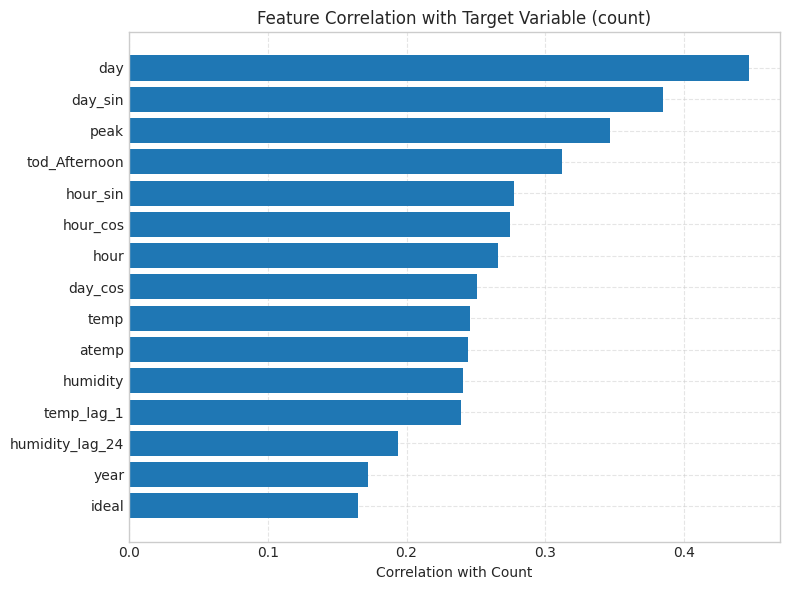

In [ ]:
count_corr = (
    all_df_extras.corr(numeric_only=True)[['count']]
    .drop(['count', 'count_log', 'casual', 'registered',  'casual_log', 'registered_log'])
    .apply(abs)
    .sort_values(by='count', ascending=False)
    .head(15)
)

plt.figure(figsize=(8, 6))
plt.barh(count_corr.index, count_corr['count'])
plt.xlabel('Correlation with Count')
plt.title('Feature Correlation with Target Variable (count)')
plt.gca().invert_yaxis()  # Highest correlation on top
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Separation of Components: casual and registered are inherently part of the target variable count (since count is computed as their sum), which is why they exhibit very high correlations with count. To avoid data leakage, however, these two variables will be separated and modeled independently rather than included directly in the training features.

Redundancy in Features: The features temp and atemp show very similar behavior and high correlation with one another, so one of them will be dropped to reduce redundancy and simplify the model.

Selected Features Based on Correlation: The features that show a significant relationship with the target variable (with correlation thresholds of > 0.1 or < -0.2) include: temp, humidity, day, month, year, hour, peak, tod_Afternoon, ideal

Dropping Low-Correlation Features: Features that have nearly zero correlation with count will be dropped during the training stage, as they are unlikely to contribute meaningful predictive information.

### 2. Wrapper Method

In [ ]:
def _():
    from sklearn.feature_selection import SequentialFeatureSelector

    exclude_cols = [
        'datetime', 
        'date', 
        'atemp',
        'registered_log', 
        'casual_log', 
        'count_log',
        'registered', 
        'casual', 
        'count',
        'file_id', 
        'time_of_day'
    ]

    input_cols = [col for col in all_df_extras.columns if col not in exclude_cols]

    X = train[input_cols].reset_index(drop=True)
    y_r = train['registered_log'].reset_index(drop=True)





    base_model = XGBRegressor(n_estimators=100, random_state=0)
    md_cv = MonthDayKFold(date_col='datetime')

    sfs = SequentialFeatureSelector(
        estimator=base_model,
        n_features_to_select=10,
        direction='forward',
        scoring='neg_root_mean_squared_log_error',
        cv=md_cv.split(train.reset_index(drop=True)),
        n_jobs=-1,
    )

    sfs.fit(X, y=y_r)

    selected_features = list(X.columns[sfs.get_support()])

    print("Selected features:", selected_features)

_()

Selected features: ['month', 'year', 'hour', 'peak', 'tod_Evening', 'season_2', 'season_4', 'holiday_1', 'workingday_1', 'weather_4']


# Linear Regression with Filter method

In [ ]:
def _():

    naive_linear_pipeline = make_pipeline(
        MinMaxScaler(),
        Ridge(alpha=0.1)
    )

    selected_features = [
        "day_sin",
        "day_cos",
        "hour_sin",
        "hour_cos",
        "peak",
        "tod_Afternoon",
        "temp",
        "humidity",
        "temp_lag_1",
        "humidity_lag_24",
    ]


    md_cv = MonthDayKFold(date_col='datetime') 

    results = train_and_val_cv(
        {"LR" : naive_linear_pipeline}, 
        train,
        selected_features,
        md_cv,
    )

    print("\n\n")
    print(results[["rmsle_train_count", "rmsle_val_count"]])
_() 



Fold 1



Fold 2



Fold 3



Cross-validated Model Performance (Avg RMSLE):
     rmsle_train_r  rmsle_val_r  rmsle_train_c  rmsle_val_c  rmsle_train_count  \
LR       0.840167     0.820463       0.795189     0.812551           0.821682   

    rmsle_val_count  
LR         0.798448  



    rmsle_train_count  rmsle_val_count
LR           0.821682         0.798448


In [ ]:
def _():

    models = {
        "ridge_alpha_0.01" : make_pipeline(MinMaxScaler(), Ridge(alpha=0.01)),
        "ridge_alpha_0.1" : make_pipeline(MinMaxScaler(), Ridge(alpha=0.1)),
        "ridge_alpha_1.0" : make_pipeline(MinMaxScaler(), Ridge(alpha=1)),
        "ridge_alpha_10.0" : make_pipeline(MinMaxScaler(), Ridge(alpha=10)),
    }

    exclude_cols = [
        "datetime",
        "date",
        "atemp",  # high correlation with temp
        "registered_log",
        "casual_log",
        "count_log",
        "registered",
        "casual",
        "count",
        "file_id",
        "time_of_day",
    ]

    input_cols = [col for col in all_df_extras.columns if col not in exclude_cols]


    md_cv = MonthDayKFold(date_col='datetime') 

    results = train_and_val_cv(
        models, 
        train,
        input_cols,
        md_cv,
    )


    print("\n\n")
    print(results[["rmsle_train_count", "rmsle_val_count"]])
_() 


Fold 1



Fold 2



Fold 3



Cross-validated Model Performance (Avg RMSLE):
                   rmsle_train_r  rmsle_val_r  rmsle_train_c  rmsle_val_c  \
ridge_alpha_1.0        0.683067     0.673330       0.604729     0.621205   
ridge_alpha_10.0       0.687885     0.674176       0.609250     0.616007   
ridge_alpha_0.1        0.682673     0.675066       0.603915     0.635806   
ridge_alpha_0.01       0.682665     0.675389       0.603740     0.638284   

                  rmsle_train_count  rmsle_val_count  
ridge_alpha_1.0            0.657694         0.646289  
ridge_alpha_10.0           0.662303         0.648454  
ridge_alpha_0.1            0.657278         0.651123  
ridge_alpha_0.01           0.657064         0.651424  



                  rmsle_train_count  rmsle_val_count
ridge_alpha_1.0            0.657694         0.646289
ridge_alpha_10.0           0.662303         0.648454
ridge_alpha_0.1            0.657278         0.651123
ridge_alpha_0.01           0.657064         0.651424


### XGBoost with Wrapper Method

In [ ]:
def _():
    xgboost_params = {
        "n_estimators": 150,
        "max_depth": 5,
        "learning_rate": 0.1,
        "subsample": 0.7,
        "colsample_bytree": 1.0,  # add if you want column subsampling
        "reg_lambda": 1.0,  # L2 regularization
        "reg_alpha": 0.0,  # L1 regularization
        "random_state": 0,
    }

    models = {
        "XGBoost" : XGBRegressor(**xgboost_params)
    }


    selected_features = ['month', 'year', 'hour', 'peak', 'tod_Evening', 'season_2', 'season_4', 'holiday_1', 'workingday_1', 'weather_4']

    md_cv = MonthDayKFold(date_col='datetime') 
    train_and_val_cv(
        models, 
        train,
        selected_features,
        md_cv,
    )

_()


Fold 1



Fold 2



Fold 3



Cross-validated Model Performance (Avg RMSLE):
          rmsle_train_r  rmsle_val_r  rmsle_train_c  rmsle_val_c  \
XGBoost       0.328525     0.334156       0.541242     0.611731   

         rmsle_train_count  rmsle_val_count  
XGBoost           0.342222         0.359504  


Results with wrapper feature selection method & filter method isn't as good as fitting on all data & embedded method

In [ ]:
def _():

    lr_pipeline = make_pipeline(
        MinMaxScaler(),
        Ridge(alpha=0.1)
    )

    exclude_cols = [
        "datetime",
        "date",
        "atemp",  # high correlation with temp
        "registered_log",
        "casual_log",
        "count_log",
        "registered",
        "casual",
        "count",
        "file_id",
        "time_of_day",
    ]

    input_cols = [col for col in all_df_extras.columns if col not in exclude_cols]


    md_cv = MonthDayKFold(date_col='datetime') 

    results = train_and_val_cv(
        {"LR" : lr_pipeline}, 
        train,
        input_cols,
        md_cv,
    )


    print("\n\n")
    print(results[["rmsle_train_count", "rmsle_val_count"]])
_() 

In [ ]:
def _():

    models = {
        "xgb_d3_lr0.1": XGBRegressor(
            n_estimators=200, max_depth=3, learning_rate=0.1,
            subsample=0.8, colsample_bytree=0.8, reg_alpha=0, 
            reg_lambda=1, random_state=0
        ),
        "xgb_d5_lr0.1": XGBRegressor(
            n_estimators=200, max_depth=5, learning_rate=0.1,
            subsample=0.8, colsample_bytree=0.8, reg_alpha=0, 
            reg_lambda=1, random_state=0
        ),
        "xgb_d5_lr0.05": XGBRegressor(
            n_estimators=300, max_depth=5, learning_rate=0.05,
            subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, 
            reg_lambda=5, random_state=0
        ),
        "xgb_d7_lr0.01": XGBRegressor(
            n_estimators=500, max_depth=7, learning_rate=0.01,
            subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, 
            reg_lambda=10, random_state=0
        ),
    }


    selected_features = [
        "hour",
        "workingday_1",
        "temp",
        "sticky",
        "month",
        "year",
        "weather_3",
        "tod_Afternoon",
        "dow",
        "humidity"
    ]

    md_cv = MonthDayKFold(date_col='datetime') 
    train_and_val_cv(
        models, 
        train,
        selected_features,
        md_cv,
    )
_() 


Fold 1



Fold 2



Fold 3



Cross-validated Model Performance (Avg RMSLE):
                rmsle_train_r  rmsle_val_r  rmsle_train_c  rmsle_val_c  \
xgb_d5_lr0.05       0.203572     0.280833       0.347973     0.492705   
xgb_d5_lr0.1        0.173544     0.287650       0.308512     0.499230   
xgb_d7_lr0.01       0.237763     0.295540       0.370076     0.496262   
xgb_d3_lr0.1        0.270049     0.294144       0.428402     0.502360   

               rmsle_train_count  rmsle_val_count  
xgb_d5_lr0.05           0.204167         0.286018  
xgb_d5_lr0.1            0.174804         0.286960  
xgb_d7_lr0.01           0.235954         0.298165  
xgb_d3_lr0.1            0.270381         0.302512  


# Inference on test set

In [ ]:

def _():
    xgboost_params = {
        "n_estimators": 300,
        "max_depth": 5,
        "learning_rate": 0.05,
        "subsample": 0.8,
        "colsample_bytree": 0.8, 
        "reg_lambda": 1.0,  
        "reg_alpha": 5, 
        "random_state": 0,
    }

    base_model = XGBRegressor(**xgboost_params)
    model = DualTargetRegressor(base_model)

    selected_features = [
        "hour",
        "workingday_1",
        "temp",
        "sticky",
        "month",
        "year",
        "weather_3",
        "tod_Afternoon",
        "dow",
        "humidity"
    ]

    test = all_df_extras[all_df_extras['file_id'] == 'test']

    X_test = test[selected_features]
    X_train, y_train_r, y_train_c = prep_data(train, selected_features)


    model.fit(X_train, (y_train_r, y_train_c))
    pred_test_r, pred_test_c = model.predict(X_test)
    pred_test_comb = combine_predictions(pred_test_r, pred_test_c)

    print(pred_test_comb)

    submission = test[['datetime']].reset_index(drop=True)
    submission['count'] = pred_test_comb
    print(submission)

    submission.to_csv('submission.csv', index=False)
_() 

[  9.   5.   3. ... 129.  94.  63.]
                 datetime  count
0     2011-01-20 00:00:00    9.0
1     2011-01-20 01:00:00    5.0
2     2011-01-20 02:00:00    3.0
3     2011-01-20 03:00:00    2.0
4     2011-01-20 04:00:00    2.0
...                   ...    ...
6488  2012-12-31 19:00:00  233.0
6489  2012-12-31 20:00:00  160.0
6490  2012-12-31 21:00:00  129.0
6491  2012-12-31 22:00:00   94.0
6492  2012-12-31 23:00:00   63.0

[6493 rows x 2 columns]
